# Visualizing the data

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from preprocessing import generate_balanced_data, hog_features
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
from time import time
import random
from visiualizing import visualize_samples

In [2]:
seed = 1
np.random.seed(seed)
random.seed(seed)

In [3]:
dataset = np.load('../data/dataset.npz')
X, y = dataset['X'], dataset['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=seed, stratify=y
)

X_train, y_train = generate_balanced_data(X_train, y_train, seed=seed)

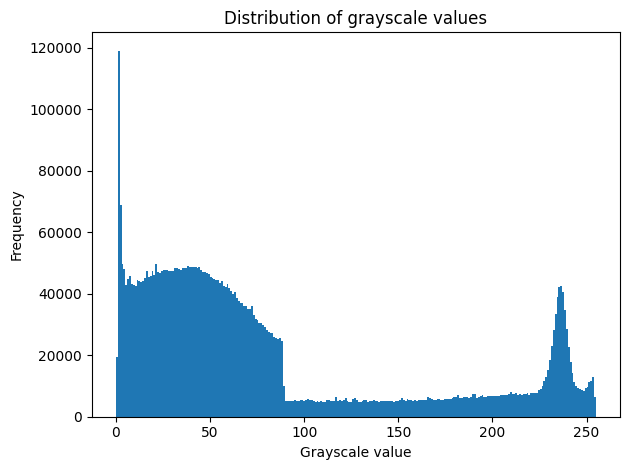

In [4]:
#distribution of grayscale values
gray_values = X_train.flatten()
plt.hist(gray_values, bins=256)
plt.title('Distribution of grayscale values')
plt.xlabel('Grayscale value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# corrupt dataset

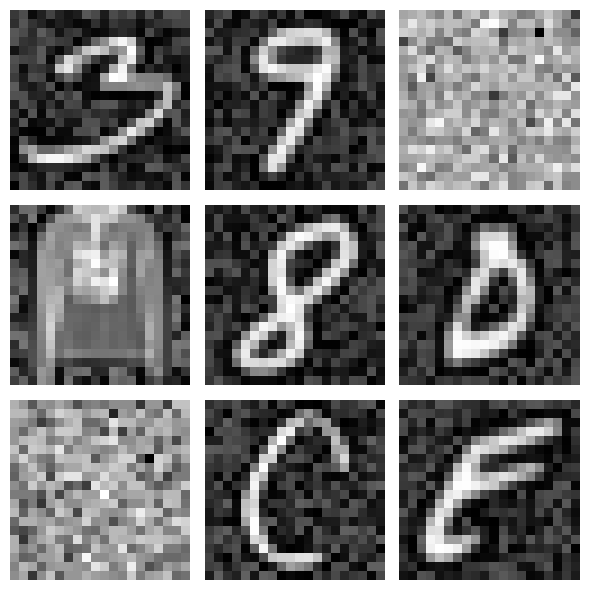

In [5]:
dataset = np.load('../data/corrupt_dataset.npz')
X = dataset['X']

visualize_samples(X)